In [19]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open('456.jpg')

In [2]:
# 將 PIL.image.image轉成 np.array
def image_to_array(image):
    image = np.array(image)
    return image

In [3]:
# RGB to gray_1
'''
gray = 0.299*R + 0.587*G + 0.114*B
'''
def gray_image_1(image):
    # 先轉成 RGB array
    image_array = np.array(image)
    h,w = image.size
    for x in range(w):
        for y in range(h):
            gray_value = 0.299*image_array[x,y,0] + 0.587*image_array[x,y,1] + 0.114*image_array[x,y,2]
            image_array[x,y,0] = gray_value
            image_array[x,y,1] = gray_value
            image_array[x,y,2] = gray_value
    return image_array

In [4]:
# RGB to gray_2，簡易型 但很爛 別用
'''
gray = (r+g+b)/2
'''
def gray_image_2(image):
    # 先轉成 RGB array
    image_array = np.array(image)
    h,w = image.size
    for x in range(w):
        for y in range(h):
            gray_value = (image_array[x,y,0] + image_array[x,y,1] + image_array[x,y,2])/2
            image_array[x,y,0] = gray_value
            image_array[x,y,1] = gray_value
            image_array[x,y,2] = gray_value
    return image_array

In [5]:
# Gray to RGB
def gray_to_rgb(image):
    # 先轉成 RGB array
    image_rgb = np.array(image)
    h,w = image.size
    for x in range(w):
        for y in range(h):
            gray_value = 0.299*image_rgb[x,y,0] + 0.587*image_rgb[x,y,1] + 0.114*image_rgb[x,y,2]
            image_rgb[x,y,0] = gray_value
            image_rgb[x,y,1] = gray_value
            image_rgb[x,y,2] = gray_value
    return image_rgb

In [6]:
# RGB to XYZ色彩空間
'''
XYZ方便與 RGB色彩空間互相轉換
image 為 PIL.Image.Image
Image.fromarray(matrix, 'RGB')
'''
def rgb_to_xyz(image):
    rgb_array = np.array(image)
    h,w = image.size
    xyz_to_rgb_matrix = np.array[[[ 3.240479, -1.53715, -0.498535],
                                  [-0.969256, 1.875991,  0.041556],
                                  [ 0.055648,-0.204043,  1.057311]]]
    for x in range(w):
        for y in range(h):
            rgb_array 

In [50]:
w,h = image.size
print(f'w = {w}')
print(f'h = {h}')

w = 31
h = 22


In [16]:
# Average filtering (均值濾波)
'''
image 為 PIL.Image.Image
n為陣列值3:3*3  5:5*5 7*7
'''
def ave_filtering(image, n):
    #轉換array
    image_array = np.array(image)  
    #空 list
    image_array_mesh = []
    
    w,h = image.size
    count_x = 0
    count_y = 0
    count_edge = (n+1)/2
    
    #先根據 n去劃分mesh
    for y in np.arange(0, h, n):
        count_x = 0
        count_y += n
    
        
        for x in np.arange(0, w, n):

            if (w-count_x) > n and (h-count_y+n) > n:
                print(1)
                image_array_mesh.append(image_array[y:y+n, x:x+n])
                
            elif n > (w-count_x) > 0 and (h-count_y+n) > n:
                print(2)
                image_array_mesh.append(image_array[y:y+n, w-n:w])
            elif     (w-count_x) > n and n > (h-count_y+n) > 0:
                print(3)
                image_array_mesh.append(image_array[h-n:h, x:x+n])
            elif n > (w-count_x) > 0 and n > (h-count_y+n) > 0:
                print(4)
                image_array_mesh.append(image_array[h-n:h, w-n:w])
            else:
                print('X')
                pass
            count_x += n
    
    return  image_array_mesh

In [ ]:
    #下列程式主要將
    x_scale = 0
    y_scale = 0
    if n > h%n > 0:
        x_scale = h//n+1
    else:
        x_scale = h//n
    if n > w%n > 0:
        y_scale = w//n+1
    else:
        y_scale = w//n
    #把 list轉成 array
    image_array_mesh = np.array(image_array_mesh)
    #把array的shape排列成 mesh分佈的樣子
    image_array_mesh = image_array_mesh.reshape(x_scale, y_scale)

In [20]:
a = ave_filtering(image, 10)
type(a)

1
1
1
2
1
1
1
2
3
3
3
4


list

In [39]:
a[1]

array([[[254, 254, 254],
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [251, 251, 251]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        [  4,   4,   4],
        [  0,   0,   0],
        [  5,   5,   5],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  6,   6,   6],
        [  0,   0,   0],
        [  3,   3, 

In [42]:
qqq[0:10,10:20]

array([[[254, 254, 254],
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [251, 251, 251]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        [  4,   4,   4],
        [  0,   0,   0],
        [  5,   5,   5],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  6,   6,   6],
        [  0,   0,   0],
        [  3,   3, 

In [37]:
qqq = np.array(image)

In [21]:
len(a)

12

In [44]:
b = np.array(a)
b.shape

(12, 10, 10, 3)

In [45]:
c = b.reshape(4,3,10,10,3)

In [25]:
image.size

(31, 22)

In [43]:
z = np.zeros((22, 31, 3))

In [46]:
z[:10,   :10] = c[0,0]
z[:10, 10:20] = c[1,0]
z[:10, 20:30] = c[2,0]
z[:10, 21:31] = c[3,0]

z[10:20,  :10] = c[0,1]
z[10:20,10:20] = c[1,1]
z[10:20,20:30] = c[2,1]
z[10:20,21:31] = c[3,1]

z[12:22,  :10] = c[0,2]
z[12:22,10:20] = c[1,2]
z[12:22,20:30] = c[2,2]
z[12:22,21:31] = c[3,2]

In [47]:
Image.fromarray(z, 'RGB')

In [40]:
w1, h1 = c.shape

In [32]:
z = np.zeros((22, 31, 3))
h, w, r = z.shape
n = 10
count_x1 = 0
count_y1 = 0
for y in np.arange(0, h, n):
    count_y1 += n
    for x in np.arange(0, w, n):
        w1 = int((x+n)/n-1)
        h1 = int((y+n)/n-1)
        if   (w-count_x1) > n and (h-count_y1) >n:
            z[y:y+n, x:x+n] = c[w1, h1]
        elif  n > (w-count_x1) > 0 and (h-count_y1) >n:
            z[y:y+n, (w-n):w] = c[w1, h1]
        elif (w-count_x1) > n and n > (h-count_y1) > 0:
            z[(h-n):h, x:x+n] = c[w1, h1]
        elif n > (w-count_x1) >0 and n > (h-count_y1) > 0:
            z[(h-n):h, (w-n):w] = c[w1, h1]
        count_x1 += n

In [33]:
z.shape

(22, 31, 3)

In [34]:
Image.fromarray(z, 'RGB')

In [117]:
np.array(image)

array([[[ 6,  7, 11],
        [ 0,  0,  4],
        [ 0,  0,  4],
        ...,
        [ 0,  9,  4],
        [ 0,  9,  4],
        [ 3, 14,  8]],

       [[ 8,  9, 13],
        [ 0,  1,  5],
        [ 0,  1,  4],
        ...,
        [ 4, 10,  6],
        [ 2, 11,  6],
        [ 4, 14,  6]],

       [[10, 14, 17],
        [ 1,  5,  8],
        [ 0,  4,  7],
        ...,
        [ 5, 11,  7],
        [ 5, 12,  5],
        [ 3, 13,  5]],

       ...,

       [[15, 21, 21],
        [18, 24, 22],
        [ 7, 13, 11],
        ...,
        [ 4,  4, 14],
        [ 3,  3, 15],
        [ 0,  2, 14]],

       [[19, 25, 23],
        [21, 27, 25],
        [ 7, 13, 11],
        ...,
        [ 3,  3, 13],
        [ 3,  3, 15],
        [ 0,  1, 13]],

       [[22, 28, 26],
        [22, 28, 26],
        [ 6, 12, 10],
        ...,
        [ 3,  3, 13],
        [ 3,  3, 15],
        [ 0,  1, 13]]], dtype=uint8)

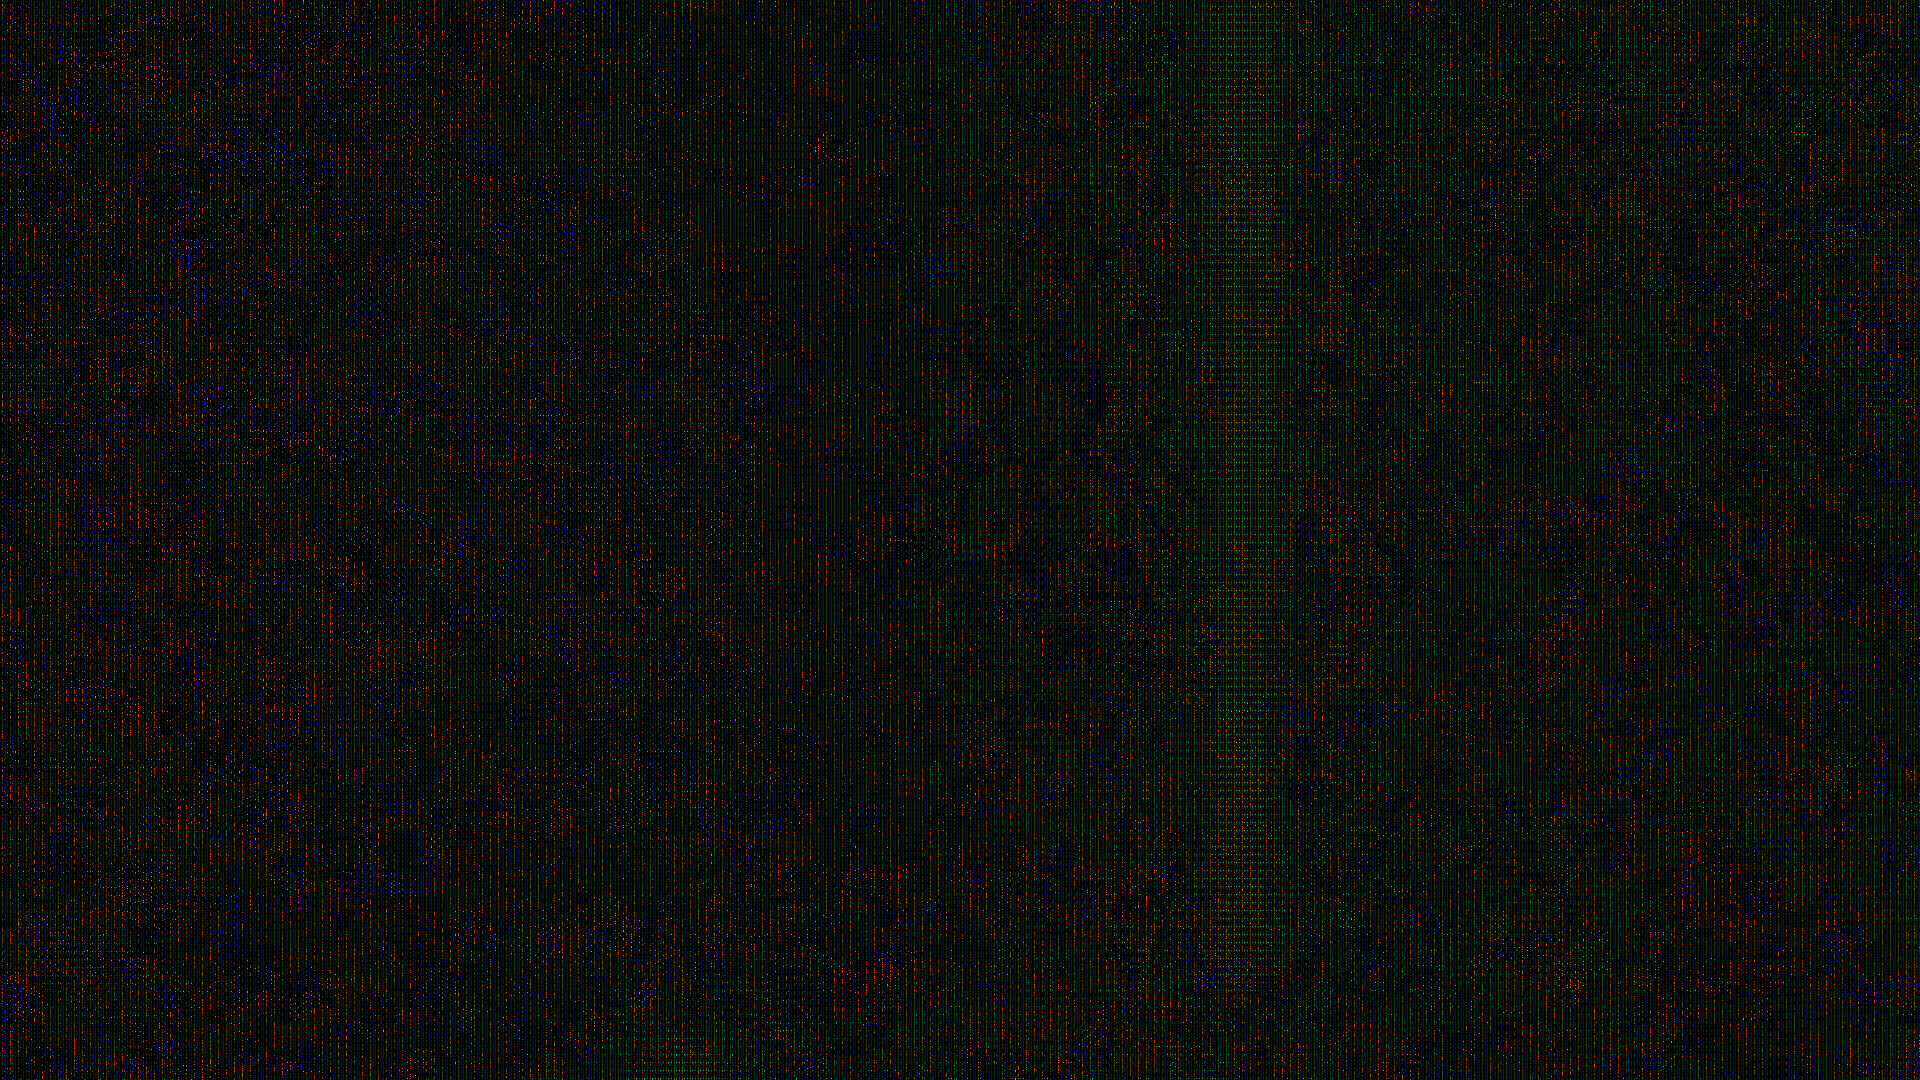

In [119]:
Image.fromarray(z, 'RGB')

In [63]:
z[0:3,0:3]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [39]:
d = np.array(image)
d.shape

(1080, 1920, 3)

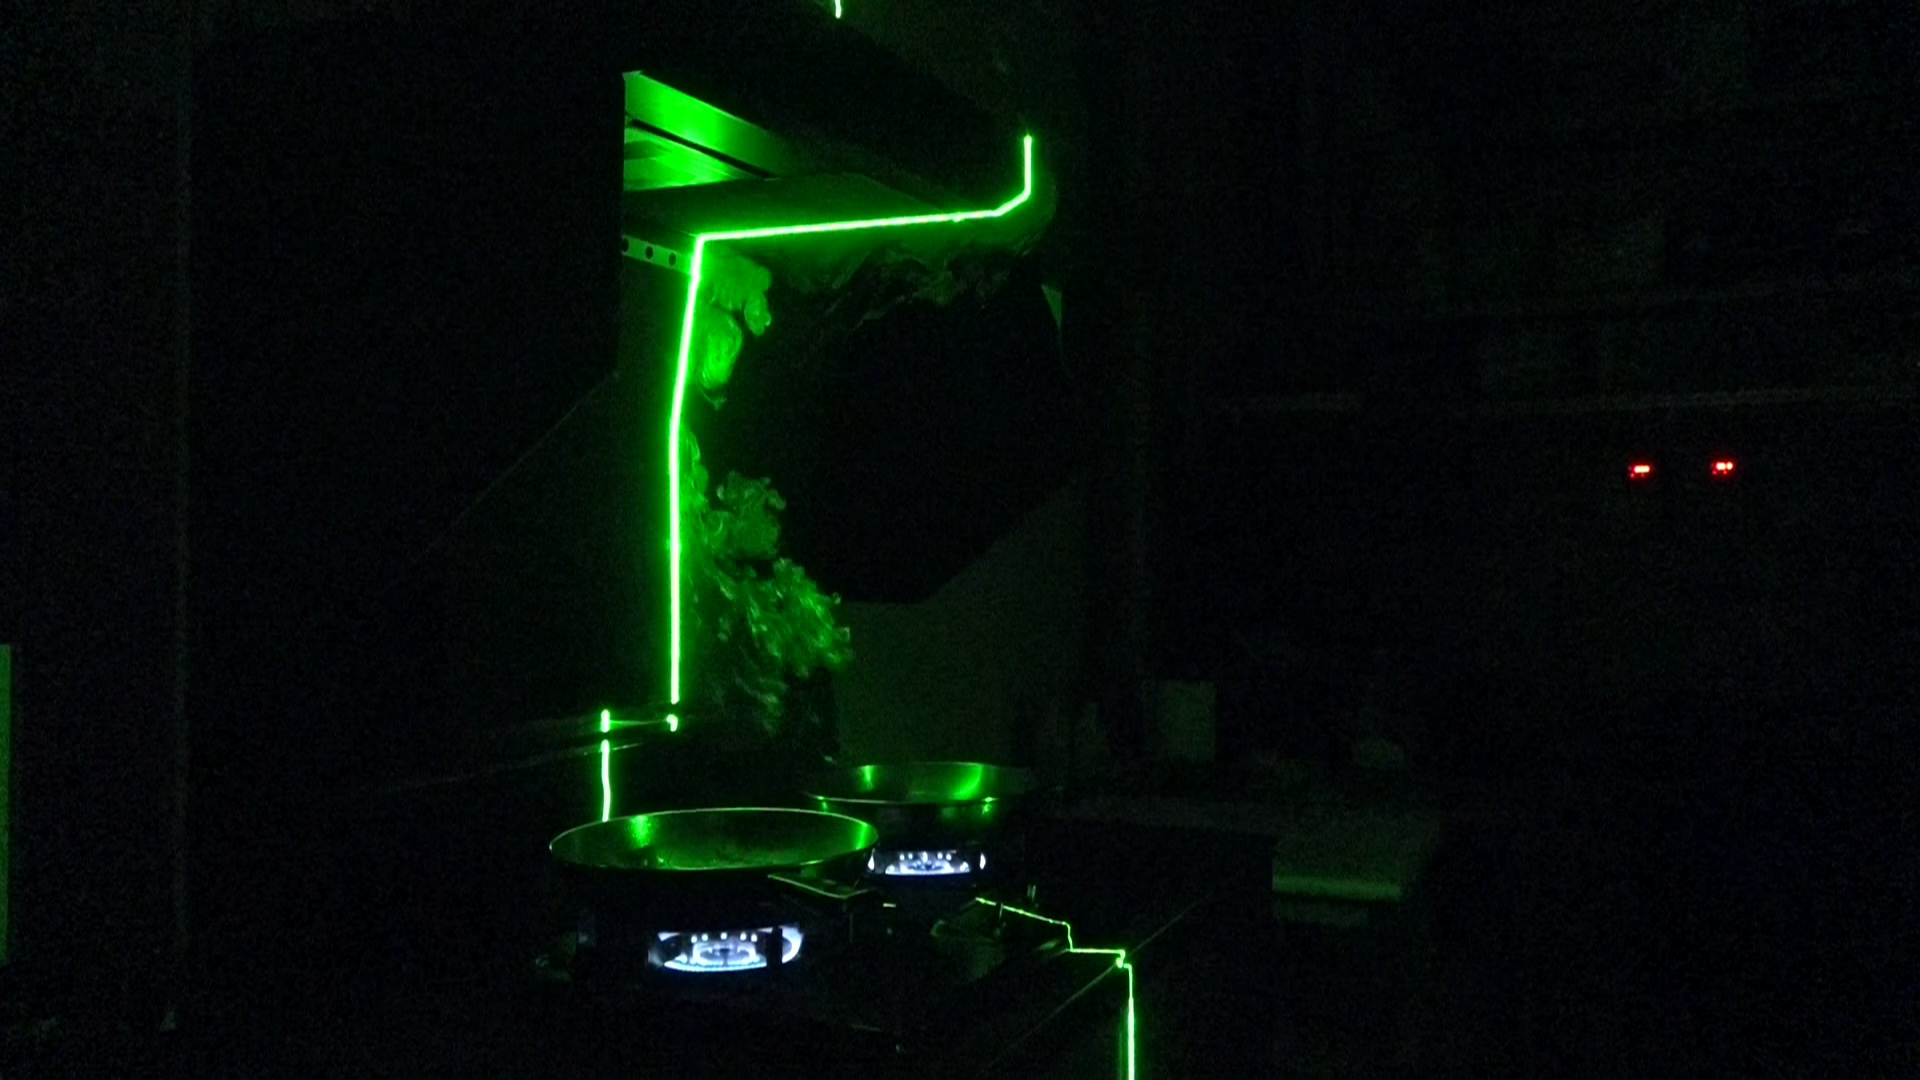

In [38]:
Image.fromarray(np.array(image))

In [ ]:
    x_scale = 0
    y_scale = 0
    if n > h%n > 0:
        x_scale = h//n+1
    else:
        x_scale = h//n
    if n > w%n > 0:
        y_scale = w//n+1
    else:
        y_scale = w//n
    #把 list轉成 array
    image_array_mesh = np.array(image_array_mesh)
    #把array的shape排列成 mesh分佈的樣子
    image_array_mesh = image_array_mesh.reshape(x_scale, y_scale)

In [56]:
a = gray_image_1(image)

In [57]:
b = Image.fromarray(a)

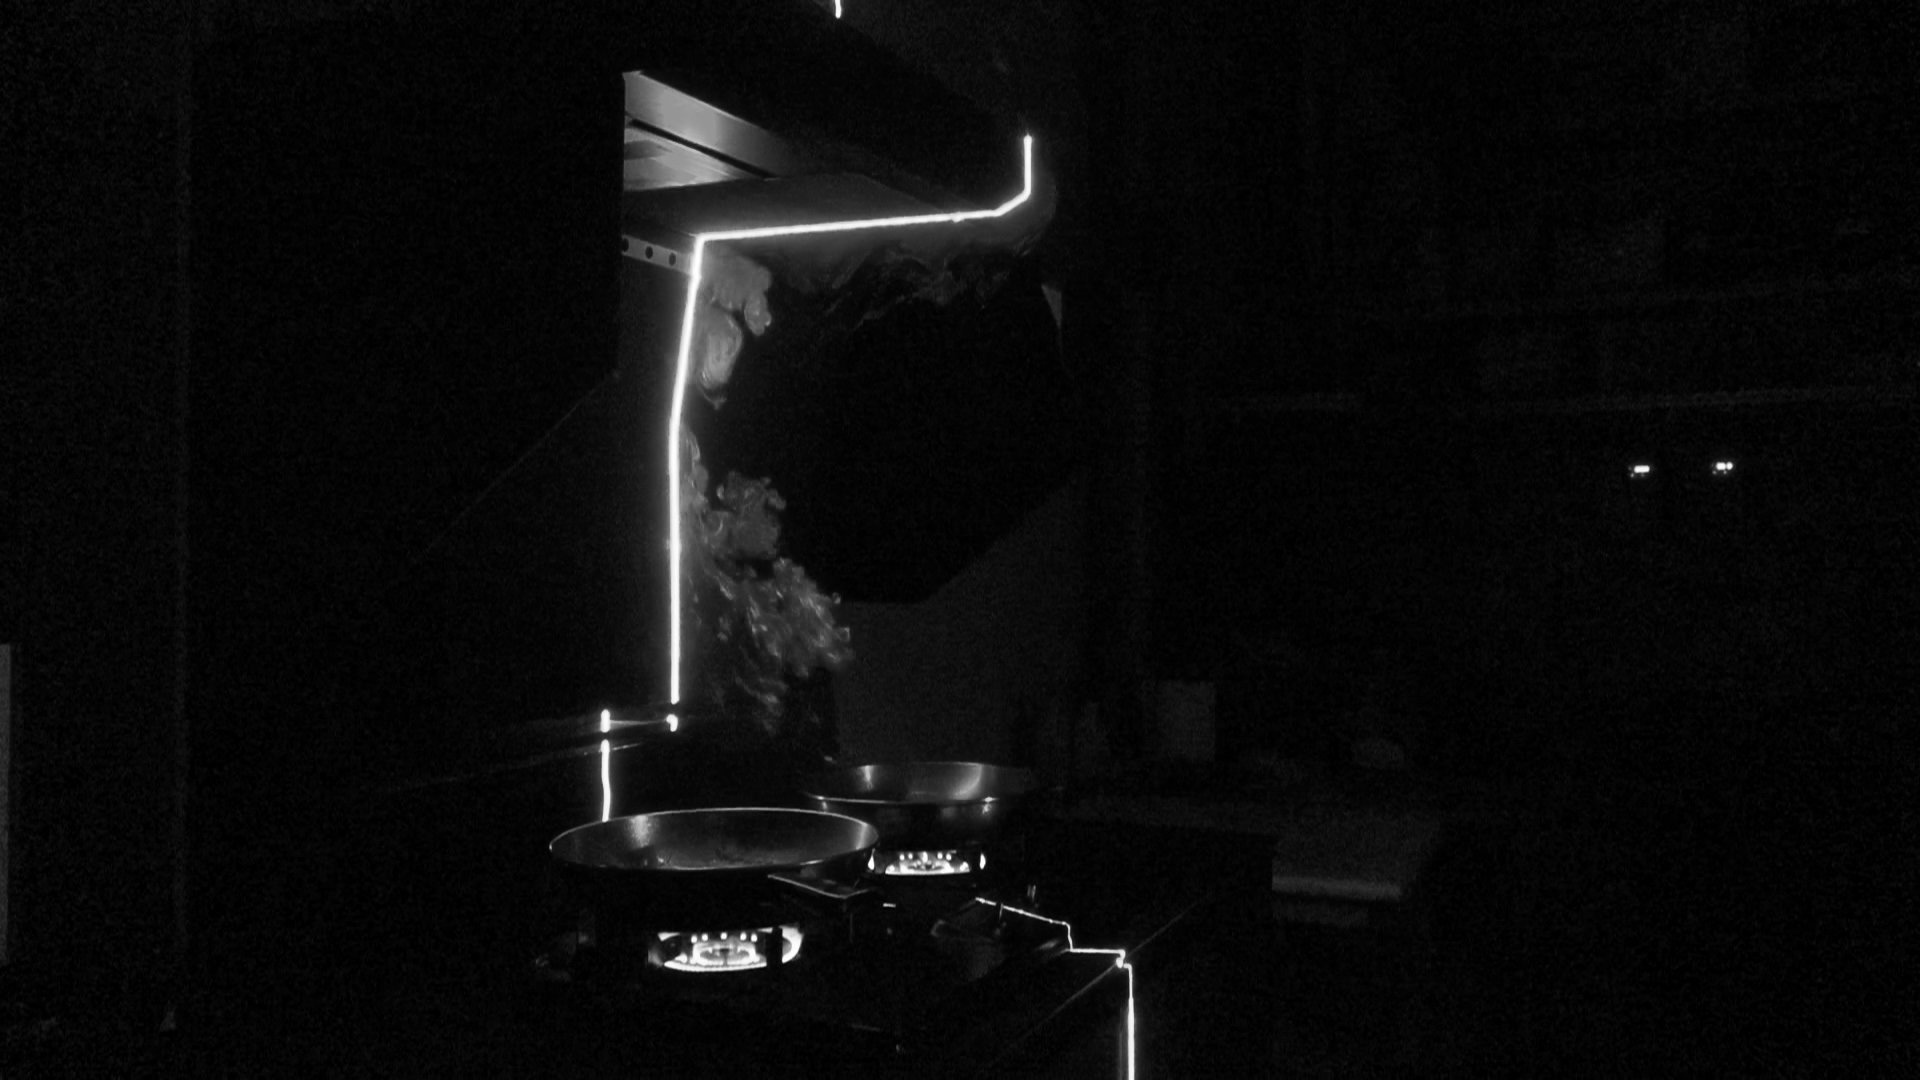

In [58]:
b

In [94]:
c = np.array(ave_filtering(b, 500))

In [95]:
c.shape

(15,)

In [93]:
c

array([[[[ 7,  7,  7],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [13, 13, 13],
         [12, 12, 12],
         [ 6,  6,  6]],

        [[ 9,  9,  9],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [11, 11, 11],
         [11, 11, 11],
         [ 6,  6,  6]],

        [[13, 13, 13],
         [ 4,  4,  4],
         [ 3,  3,  3],
         ...,
         [10, 10, 10],
         [ 9,  9,  9],
         [ 6,  6,  6]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 3,  3,  3],
         [ 2,  2,  2],
         [ 1,  1,  1]],

        [[ 2,  2,  2],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 3,  3,  3],
         [ 2,  2,  2],
         [ 2,  2,  2]],

        [[ 3,  3,  3],
         [ 3,  3,  3],
         [ 3,  3,  3],
         ...,
         [ 3,  3,  3],
         [ 3,  3,  3],
         [ 2,  2,  2]]],


       [[[18, 18, 18],
         [20, 20, 20],
         [20, 

In [66]:
n=10
for i in np.arange(n,51,n):
    print(i)

10
20
30
40
50


In [71]:
h,w=image.size

In [72]:
h

1920

In [74]:
np.array(image).shape

(1080, 1920, 3)

In [84]:
zzz = 1
if zzz==0:
    print(1)
elif zzz==2:
    pass
else:
    print(3)

3


In [267]:
image_array = np.array(image)
n=500   
#空 list
image_array_mesh = []
    
w,h = image.size
count_x = 0
count_y = 0
count_edge = (n+1)/2
    
#先根據 n去劃分mesh
for y in np.arange(0, h, n):
    count_x = 0
    count_y += n
    
    print(1)
    for x in np.arange(0, w, n):

        if (w-count_x) > n:
            image_array_mesh.append(image_array[y:y+n, x:x+n])
            print(3)
        elif n > (w-count_x) > 0:
            image_array_mesh.append(image_array[y:y+n, w-n:w])
            print(4)
        else:
            print('X')
            pass
        count_x += n
    

1
3
3
3
4
1
3
3
3
4
1
3
3
3
4


In [ ]:
image_array = np.array(image)
n=500   
#空 list
image_array_mesh = []
    
w,h = image.size
count_x = 0
count_y = 0
count_edge = (n+1)/2
    
#先根據 n去劃分mesh
for y in np.arange(n, h, n):
    count_y += n
    for x in np.arange(n, w, n):
        image_array_mesh.append(image_array[y-n:y, x-n:x])
        count_x += n
        if w == count_x:
            pass
        elif n > (w-count_x) > 0:
            image_array_mesh.append(image_array[y-n:y, w-n:w])
        else:
            pass
                
        if h == count_y:
            pass
        elif n > (h-count_y) > 0:
            image_array_mesh.append(image_array[h-n:h, x-n:x])
        else:
            pass

In [243]:
len(image_array_mesh)

10

In [244]:
image_array_mesh

[array([[[ 6,  7, 11],
         [ 0,  0,  4],
         [ 0,  0,  4],
         ...,
         [ 4,  4,  6],
         [ 1,  1,  1],
         [ 3,  3,  3]],
 
        [[ 8,  9, 13],
         [ 0,  1,  5],
         [ 0,  1,  4],
         ...,
         [ 3,  3,  5],
         [ 0,  0,  0],
         [ 3,  3,  3]],
 
        [[10, 14, 17],
         [ 1,  5,  8],
         [ 0,  4,  7],
         ...,
         [ 2,  3,  5],
         [ 1,  1,  1],
         [ 2,  2,  2]],
 
        ...,
 
        [[ 2,  5, 10],
         [ 4,  7, 12],
         [ 5,  8, 13],
         ...,
         [ 5, 10,  6],
         [ 3,  8,  4],
         [ 4,  9,  5]],
 
        [[ 2,  5, 10],
         [ 4,  7, 12],
         [ 5,  8, 13],
         ...,
         [ 5, 10,  6],
         [ 3,  8,  4],
         [ 1,  6,  2]],
 
        [[ 3,  6, 11],
         [ 5,  8, 13],
         [ 6,  9, 14],
         ...,
         [ 5, 10,  6],
         [ 4,  9,  5],
         [ 0,  5,  1]]], dtype=uint8), array([[[ 8,  8,  8],
         [ 9,  9,  9

In [230]:
a = np.array(image_array_mesh)

In [231]:
a.shape

(10, 500, 500, 3)

In [184]:
image_array.shape

(1080, 1920, 3)

In [228]:
image_array[1079,1919].shape

(3,)

In [246]:
q = []

In [249]:
q.append(image_array[0:500,0:500,:])
q.append(image_array[0:500,500:1000,:])

In [250]:
len(q)

4

In [209]:
e = np.array(q)

In [211]:
e.shape

(2, 500, 500, 3)

In [212]:
a = np.array([[1,2,3],[1,2,3],[1,2,3]])
a

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [213]:
b = np.array([[1,2],[1,2]])
b

array([[1, 2],
       [1, 2]])

In [214]:
c=[]

In [215]:
c.append(a)

In [217]:
c.append(a)

In [221]:
c.append(a)

In [224]:
c.append(a)

In [225]:
d = np.array(c)

In [226]:
d.shape

(4, 3, 3)

In [55]:
nnn = np.zeros((3,3,3))
nnn

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [59]:
t,y,u = nnn.shape

In [58]:
nnn.size

27